In [183]:
import cv2 
from PIL import Image 
import numpy as np 
import pandas as pd 
import ast
import matplotlib.pyplot as plt

In [184]:
base_dir = '/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/'
def load_image(path):
    img = Image.open(f'{base_dir}{path}')
    #Resize the image to 320x320
    #img = img.resize((320, 320))
    #img = np.array(img)
    #img = np.array(img)
    #img = img.flatten()
    return img

In [185]:
converters = {
    'Label': lambda x: ast.literal_eval(x),
    'MaskDir': lambda x: ast.literal_eval(x) if str(x) != 'nan' else x
}
# Load the dataframes
train_data = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/VitusData/Train.csv',
                        converters=converters)
#train_data = train_data.drop(['Unnamed: 0'], axis=1)
val_data = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/VitusData/Val.csv',
                       converters=converters)
#val_data = test_data.drop(['Unnamed: 0'], axis=1)

test_data = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/VitusData/Test.csv',
                       converters=converters)
#test_data = test_data.drop(['Unnamed: 0'], axis=1)

In [186]:
fault_data_train = train_data[train_data['is_fault']]
fault_data_val = val_data[val_data['is_fault']]
fault_data_test = test_data[test_data['is_fault']]

In [22]:
fault_data['Label']

21                                                [CrackC]
130                                        [FingerFailure]
206      [CrackA, CrackB, FingerFailure, FingerFailure,...
300                                               [CrackB]
400                                               [CrackA]
                               ...                        
21183                                      [FingerFailure]
21201                                             [CrackC]
21222    [CrackA, FingerFailure, FingerFailure, FingerF...
21313                                      [FingerFailure]
21596                                             [CrackB]
Name: Label, Length: 306, dtype: object

In [34]:
fault_data_train = fault_data_train.explode('Label')
fault_data_test = fault_data_test.explode('Label')

In [35]:
fault_data_train.groupby('Label').count()

,ImageDir,MaskDir,is_fault
Label,,,
CrackA,137,137,137
CrackB,164,164,164
CrackC,64,64,64
FingerFailure,146,146,146


In [36]:
fault_data_test.groupby('Label').count()

,ImageDir,MaskDir,is_fault
Label,,,
CrackA,27,27,27
CrackB,55,55,55
CrackC,16,16,16
FingerFailure,54,54,54


In [37]:
train_data.explode('Label').groupby('Label').count()

,ImageDir,MaskDir,is_fault
Label,,,
CrackA,137,137,137
CrackB,164,164,164
CrackC,64,64,64
FingerFailure,146,146,146
Negative,21325,21325,21325


In [44]:
val_data.explode('Label').groupby('Label').count()

,Unnamed: 0,ImageDir,MaskDir,is_fault
Label,,,,
CrackA,27,27,27,27
CrackB,55,55,55,55
CrackC,16,16,16,16
FingerFailure,54,54,54,54
Negative,7109,7109,7109,7109


In [45]:
test_data.explode('Label').groupby('Label').count()

,Unnamed: 0,ImageDir,MaskDir,is_fault
Label,,,,
CrackA,42,42,42,42
CrackB,73,73,73,73
CrackC,8,8,8,8
FingerFailure,67,67,67,67
Negative,7108,7108,7108,7108


## Getting examples


In [187]:
for_plot = fault_data_train['Label'].apply(lambda x: len(x) == 1)
for_plot = fault_data_train[for_plot]
for_plot = for_plot.explode(['Label','MaskDir'])

In [188]:
[400,300,1122,130]
for_plot

,Unnamed: 0,ImageDir,Label,MaskDir,is_fault
21,31992,VitusData/Serier/Series6/CellsCorr/Serie_6_Ima...,CrackC,VitusData/Masks/-20_4280_PC_Cell_Row6_Col_4_Cr...,True
130,5111,VitusData/Serier/Series1/CellsCorr/Serie_1_Ima...,FingerFailure,VitusData/Masks/-5_4106_Cell_Row9_Col_6_Finger...,True
300,27573,VitusData/Serier/Series6/CellsCorr/Serie_6_Ima...,CrackB,VitusData/Masks/-4_4225_PC_Cell_Row4_Col_3_Cra...,True
400,26757,VitusData/Serier/Series5/CellsCorr/Serie_5_Ima...,CrackA,VitusData/Masks/-3_3928_Cell_Row5_Col_7_CrackA...,True
1122,33095,VitusData/Serier/Series6/CellsCorr/Serie_6_Ima...,CrackC,VitusData/Masks/-20_4280_PC_Cell_Row6_Col_2_Cr...,True
...,...,...,...,...,...
21182,31375,VitusData/Serier/Series6/CellsCorr/Serie_6_Ima...,CrackB,VitusData/Masks/-2_4266_PC_Cell_Row6_Col_3_Cra...,True
21183,6918,VitusData/Serier/Series1/CellsCorr/Serie_1_Ima...,FingerFailure,VitusData/Masks/-10_4104_Cell_Row1_Col_3_Finge...,True
21201,34297,VitusData/Serier/Series6/CellsCorr/Serie_6_Ima...,CrackC,VitusData/Masks/-18_4260_PC_Cell_Row7_Col_4_Cr...,True
21313,6481,VitusData/Serier/Series1/CellsCorr/Serie_1_Ima...,FingerFailure,VitusData/Masks/-16_4102_Cell_Row4_Col_1_Finge...,True


In [90]:
for_plot[for_plot['Label'] == 'FingerFailure']

,Unnamed: 0,ImageDir,Label,MaskDir,is_fault
130,5111,VitusData/Serier/Series1/CellsCorr/Serie_1_Ima...,FingerFailure,VitusData/Masks/-5_4106_Cell_Row9_Col_6_Finger...,True
1257,783,VitusData/Serier/Series1/CellsCorr/Serie_1_Ima...,FingerFailure,VitusData/Masks/-11_4125_Cell_Row1_Col_3_Finge...,True
1407,5371,VitusData/Serier/Series1/CellsCorr/Serie_1_Ima...,FingerFailure,VitusData/Masks/-11_4089_Cell_Row6_Col_5_Finge...,True
1536,7590,VitusData/Serier/Series1/CellsCorr/Serie_1_Ima...,FingerFailure,VitusData/Masks/-11_4089_Cell_Row7_Col_5_Finge...,True
2557,2685,VitusData/Serier/Series1/CellsCorr/Serie_1_Ima...,FingerFailure,VitusData/Masks/-10_4081_Cell_Row3_Col_3_Finge...,True
2900,4589,VitusData/Serier/Series1/CellsCorr/Serie_1_Ima...,FingerFailure,VitusData/Masks/-16_4095_Cell_Row2_Col_6_Finge...,True
3549,2515,VitusData/Serier/Series1/CellsCorr/Serie_1_Ima...,FingerFailure,VitusData/Masks/-14_4080_Cell_Row3_Col_1_Finge...,True
4185,1362,VitusData/Serier/Series1/CellsCorr/Serie_1_Ima...,FingerFailure,VitusData/Masks/-5_4139_Cell_Row4_Col_3_Finger...,True
4529,31656,VitusData/Serier/Series6/CellsCorr/Serie_6_Ima...,FingerFailure,VitusData/Masks/-14_4282_PC_Cell_Row3_Col_2_Fi...,True
4937,7022,VitusData/Serier/Series1/CellsCorr/Serie_1_Ima...,FingerFailure,VitusData/Masks/-4_4140_Cell_Row5_Col_5_Finger...,True


In [189]:
def get_perimiter(mask):
    border = cv2.copyMakeBorder(mask, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0 )
    contours, hierarchy = cv2.findContours(border, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE, offset=(0, 0))
    # use: cv2.drawContours(im, contours, -1, (0,255,0), 3) to draw the line around the fault.
    return contours

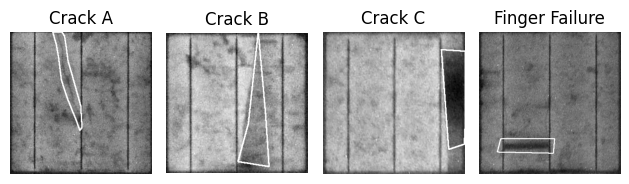

In [190]:
fig,ax = plt.subplots(1,4)
l = ['Crack A','Crack B','Crack C','Finger Failure']
for idx,i in enumerate([18941,300,1122,17106]):
    ax[idx].axis('off')
    d = for_plot.loc[i]['ImageDir']
    im = load_image(d)
    im = np.array(im)
    mask = np.array(load_image(for_plot.loc[i]['MaskDir']))
    contours = get_perimiter(mask)
    drawing = cv2.drawContours(im, contours, -1, (255,255,255), 2)
    
    ax[idx].imshow(im,cmap = 'gray')
    ax[idx].imshow(drawing,cmap = 'gray')
    ax[idx].set_title(l[idx])

plt.tight_layout()

In [110]:
1e-5 == 0.00001

True

In [191]:
cv2.__version__

'4.7.0'

In [277]:
paths = for_plot.loc[18941]['ImageDir']
pathd = for_plot.loc[300]['ImageDir']
maskp = for_plot.loc[18941]['MaskDir']

dirsrc = f'{base_dir}{paths}'
dirdst = f'{base_dir}{pathd}'
mdire = f'{base_dir}{maskp}'

src = cv2.imread(dirsrc)
dst = cv2.imread(dirdst)
mask = cv2.imread(mdire)

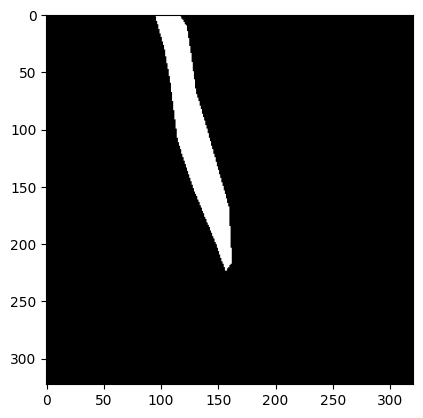

In [279]:
plt.imshow(mask)

In [230]:
# Define the region of interest (ROI) in the destination image
roi = (50, 50, 200, 200)  # (x, y, width, height)

# Crop the source image to match the size of the ROI
crop = src[roi[1]:roi[1]+roi[3], roi[0]:roi[0]+roi[2]]

# Create a mask of the ROI in the destination image
#mask = np.zeros(dst.shape[:2], dtype=np.uint8)
#mask[roi[1]:roi[1]+roi[3], roi[0]:roi[0]+roi[2]] = 255

# Perform seamless cloning of the crop into the destination image
result = cv2.seamlessClone(src, dst, mask, (150,150), cv2.NORMAL_CLONE)

In [218]:
mask.shape,src.shape,dst.shape

((323, 321, 3), (323, 321, 3), (323, 321, 3))

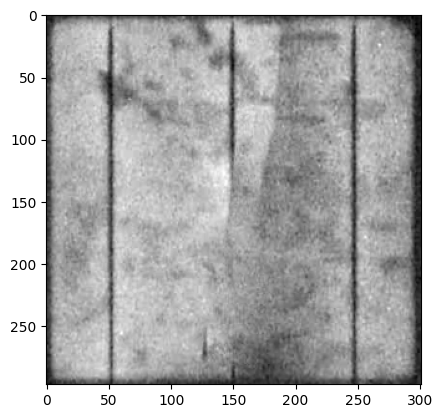

In [231]:
plt.imshow(result)

In [234]:
src.shape,dst.shape,mask.shape

((323, 321, 3), (297, 301, 3), (297, 301, 3))

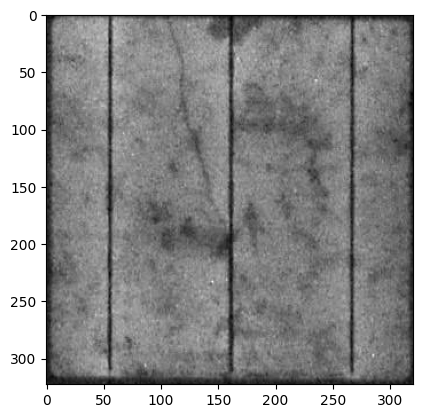

In [229]:
plt.imshow(src)

In [220]:
cv2.__version__

'4.7.0'

In [410]:
def random_clone_center(mask, dst):
    # Get the size of the destination image
    h, w = dst.shape[:2]

    # Define the size of the region to be cloned based on the size of the mask
    #roi_height, roi_width = mask.shape[:2]
    # Find the contours of the mask
    #contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Get the bounding rectangle of the contours
    #_, _, roi_width, roi_height = cv2.boundingRect(contours[0])
    height, width,_ = np.where(mask == 255)
    #print(mask)
    roi_height = (max(height)-min(height)) // 2
    roi_width = (max(width)-min(width)) // 2
    print(roi_height)
    print(roi_width)

    # Generate a random center point for the cloned region
    x = np.random.randint(roi_width+1, w - roi_width-1)
    y = np.random.randint(roi_height+1, h - roi_height-1)
    
    print(x,y)
    
    # Add half the width and height of the region to the random point
    center = (x , y )

    return center

In [411]:
def random_rotation_180(mask, img):
    # Generate a random angle between 0 and 1
    angle = np.random.randint(0, 2)

    # Rotate the mask and image by 180 degrees if angle is 1
    if angle == 1:
        mask = cv2.rotate(mask, cv2.ROTATE_180)
        img = cv2.rotate(img, cv2.ROTATE_180)
        print('test')
    return mask, img

In [412]:
def random_scale(image, mask, scale_range):
    # Generate a random scale factor
    scale_factor = np.random.uniform(*scale_range)

    # Compute the scaled image
    scaled_image = cv2.resize(image, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)

    # Compute the scaled mask
    scaled_mask = cv2.resize(mask, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)
    return scaled_mask,scaled_image

In [413]:
def poisson_blend(src,dst,mask):
    mask,src = random_rotation_180(mask, src)
    #print((src.shape,mask.shape))
    scaled_mask, scaled_src = random_scale(src,mask,[0.7,1])
    offset = random_clone_center(scaled_mask, dst)
    print(offset)
    result = cv2.seamlessClone(scaled_src, dst, scaled_mask, offset, cv2.NORMAL_CLONE)
    return result

In [414]:
dst.shape

(297, 301, 3)

In [423]:
im = poisson_blend(src,dst,mask)

test
88
25
233 100
(233, 100)


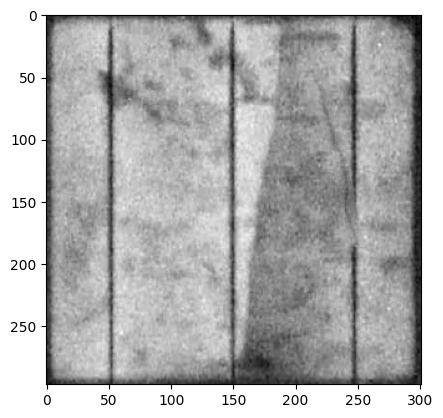

In [424]:
plt.imshow(im)

In [ ]:
scaled_mask, scaled_src = random_scale(src,mask,[0.5,2])
offset = get_random_offset(mask, dst.shape)

In [281]:
mask.shape,src.shape,dst.shape

((323, 321, 3), (323, 321, 3), (297, 301, 3))

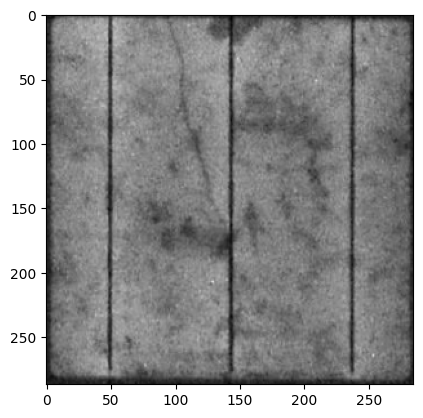

In [264]:
plt.imshow(scaled_image)